# Hierarchical Clustering

**Agglomerative Hierarchical Clustering**
- This is a bottom-up approach where each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy2
- The process continues until only one cluster is left3
- It's like building a family tree from individual leaves up to the root3

**Divisive Hierarchical Clustering**
- This is a top-down approach where all data points start in one large cluster3
- The cluster is then split recursively into smaller clusters until each data point is in its own cluster3
- Think of it as starting with a single large box and dividing it into smaller boxes until each item is in its own box.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


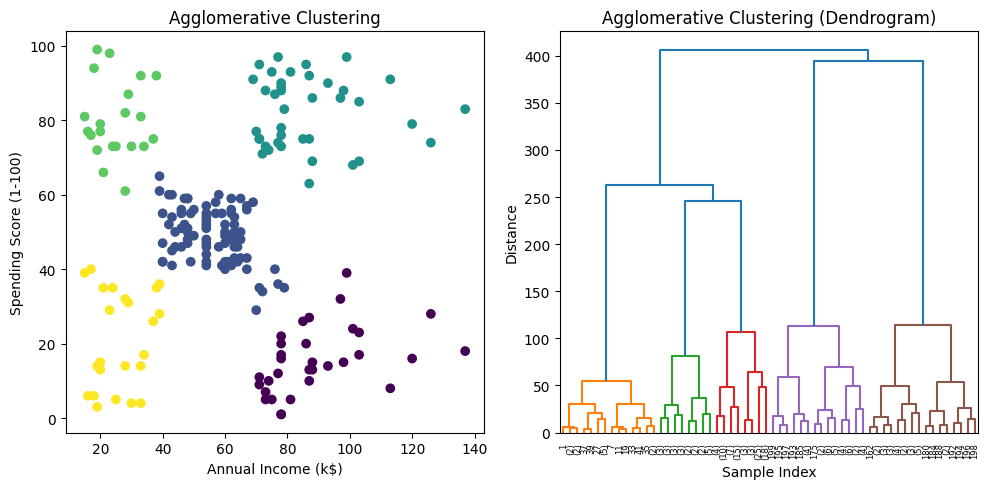

In [44]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Scatter Plot for Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglo_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Agglomerative Clustering")

# Dendrogram for Agglomerative Clustering
Z = linkage(X, 'ward')
plt.subplot(1, 2, 2)
dendrogram(Z, truncate_mode='level', p=5, color_threshold=120)
plt.title("Agglomerative Clustering (Dendrogram)")
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


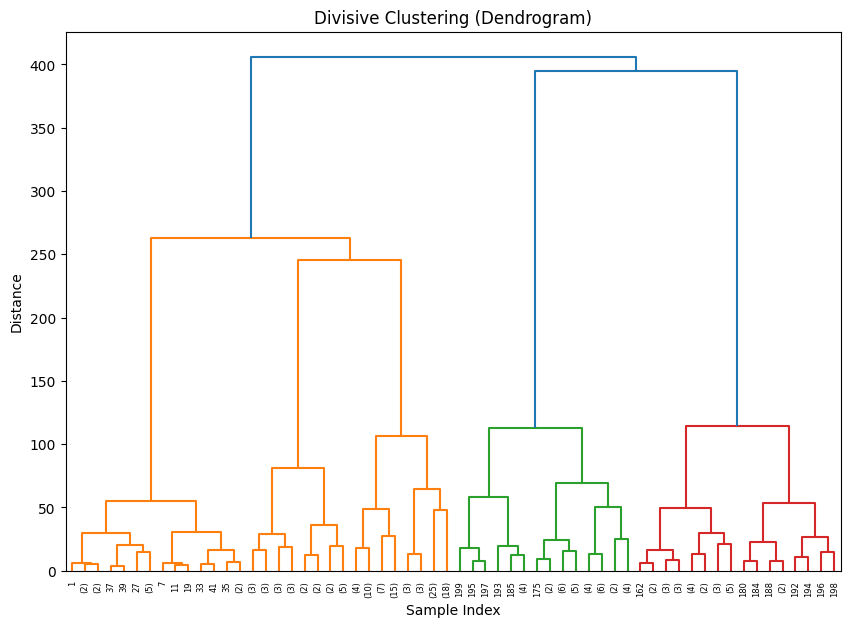

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using linkage method for divisive clustering
Z = linkage(X, 'ward')

# Plotting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Divisive Clustering (Dendrogram)")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_30749/2262130715.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set1', 5)  # 'Set1' has distinct colors for categorical data


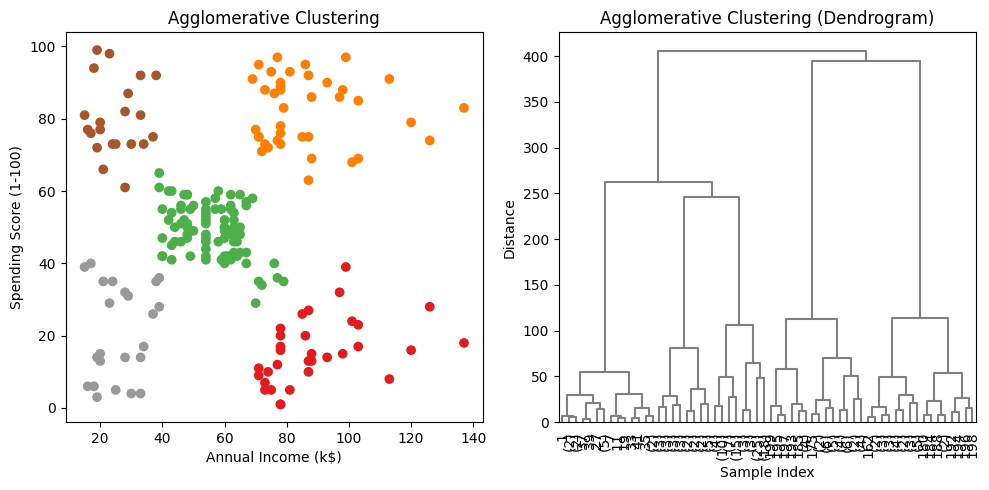

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming X is your input data (e.g., a DataFrame)

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)

# Create a color map
cmap = cm.get_cmap('Set1', 5)  # 'Set1' has distinct colors for categorical data

# Plot Scatter Plot for Agglomerative Clustering
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglo_labels, cmap=cmap)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Agglomerative Clustering")

# Perform hierarchical linkage for Dendrogram
Z = linkage(X, method='ward')

# Extract clusters from the dendrogram for 5 clusters
dendro_clusters = fcluster(Z, t=5, criterion='maxclust')

# Map dendrogram clusters to the same colors
dendro_colors = [cmap(i - 1) for i in dendro_clusters]

# Plot Dendrogram with colors matching scatter plot clusters
plt.subplot(1, 2, 2)
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0, 
           leaf_rotation=90., leaf_font_size=10.,
           above_threshold_color='gray')
plt.title("Agglomerative Clustering (Dendrogram)")
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()
